# Google PlayStore Apps Dataset

## 📌 Task 1: Load & Merge Datasets

In [57]:
# Task 1: Load, Merge, and Clean Datasets

import pandas as pd

# Load datasets
apps = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

# Rename 'Translated_Review' to 'Review' for consistency
reviews.rename(columns={'Translated_Review': 'Review'}, inplace=True)

# Merge datasets on 'App'
merged_df = pd.merge(apps, reviews, on='App', how='inner')

print(merged_df.columns)  # Check all column names

merged_df['Review'] = merged_df['Review'].fillna("")
merged_df['Sentiment'] = merged_df['Sentiment'].fillna("Neutral")

# Fill missing 'Rating' with median (more robust than mean)
merged_df['Rating'] = merged_df['Rating'].fillna(merged_df['Rating'].median())

# Fill missing 'Sentiment_Polarity' and 'Sentiment_Subjectivity' with 0 (neutral sentiment)
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].fillna(0.0)
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].fillna(0.0)

# ✅ Convert 'Reviews' to numeric (remove commas)
merged_df['Reviews'] = merged_df['Reviews'] = merged_df['Reviews'].astype(str).str.replace(',', '').astype(float)

# ✅ Convert 'Price' to numeric (remove '$' symbol)
merged_df['Price'] = merged_df['Price'].str.replace('$', '').astype(float)

# ✅ Convert 'Installs' to numeric (remove ',' and '+')
merged_df['Installs'] = merged_df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# ✅ Convert 'Size' to numeric (remove 'M' and 'k', handle 'Varies with device')
merged_df['Size'] = merged_df['Size'].replace('M', '', regex=True).replace('k', '', regex=True).replace('Varies with device', '0').astype(float)

# Display first few rows to confirm changes
display(merged_df.head())

# Check dataset size and features
print(f"Number of records: {merged_df.shape[0]}")
print(f"Number of features: {merged_df.shape[1]}")
print(f"Column Names:\n{list(merged_df.columns)}")

# Check if there are still any missing values
print("\nMissing Values Summary:\n", merged_df.isnull().sum())


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


Number of records: 122662
Number of features: 17
Column Names:
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

Missing Values Summary:
 App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Review                    0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [58]:
# Task 1: Validate dataset requirements

# Requirement 1: At least 15 features
if merged_df.shape[1] < 15:
    raise ValueError(f"Dataset has only {merged_df.shape[1]} features, but at least 15 are required.")

# Requirement 2: At least one categorical feature (for OneHotEncoding)
categorical_features = merged_df.select_dtypes(include=['object']).columns.tolist()
if len(categorical_features) == 0:
    raise ValueError("Dataset must have at least one categorical feature for OneHotEncoding.")

# Requirement 3: At least one text feature (for TF-IDF processing)
text_features = [col for col in merged_df.columns if "Review" in col]  # Assuming "Review" is text
if len(text_features) == 0:
    raise ValueError("Dataset must have at least one text feature for TF-IDF vectorization.")

print("✅ Dataset meets all requirements!")


✅ Dataset meets all requirements!


## 📌 Task 2: Data Cleaning & Preprocessing

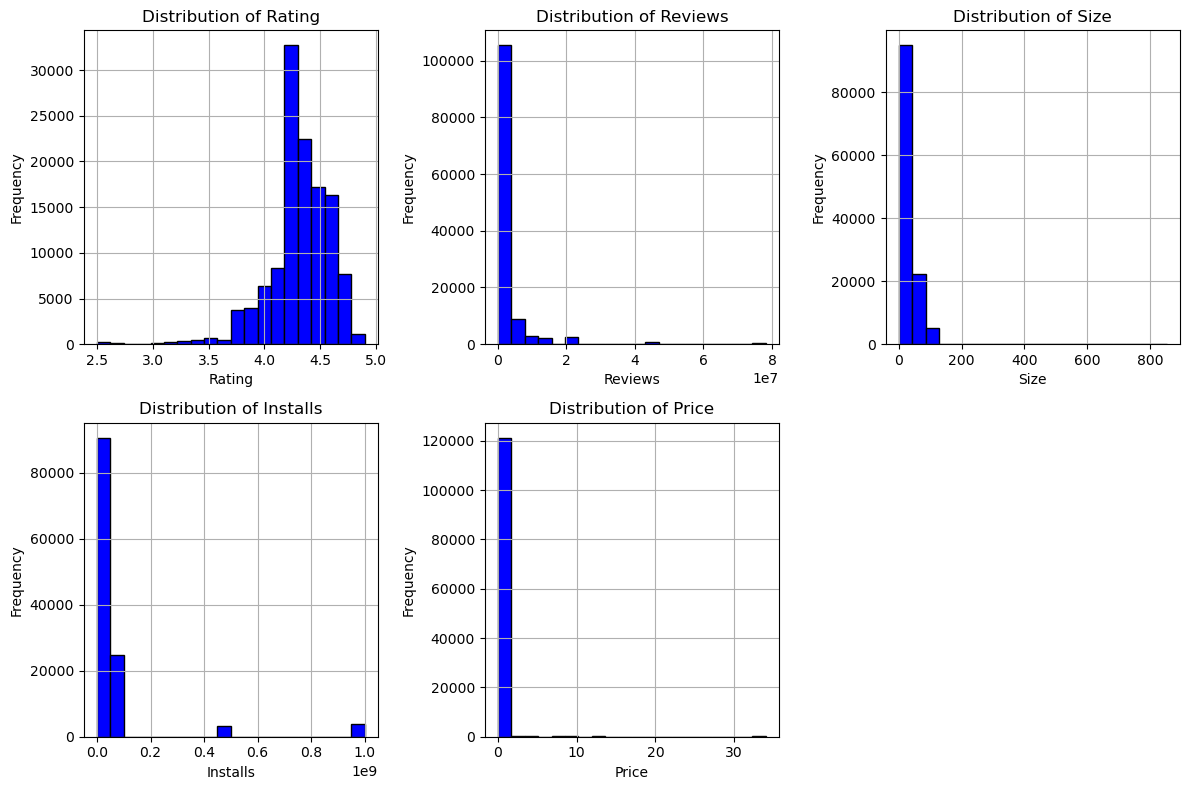

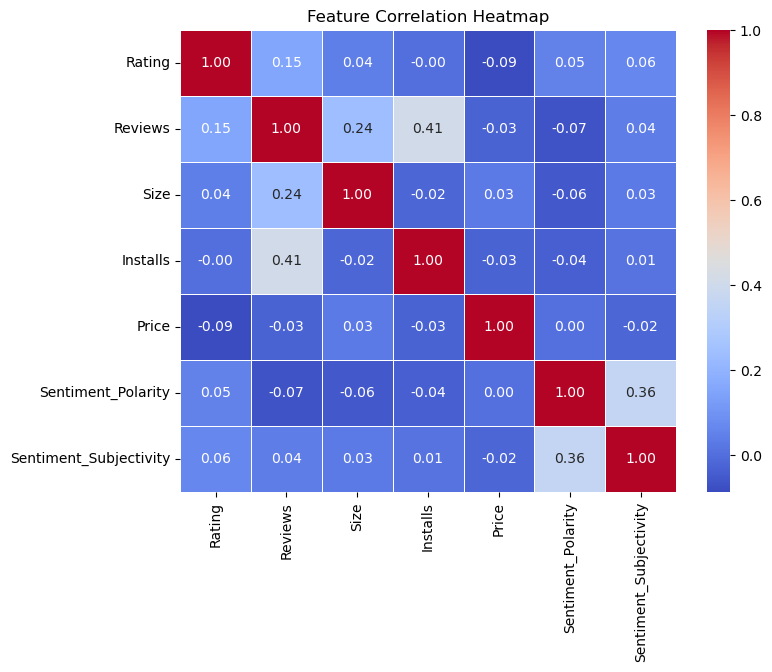

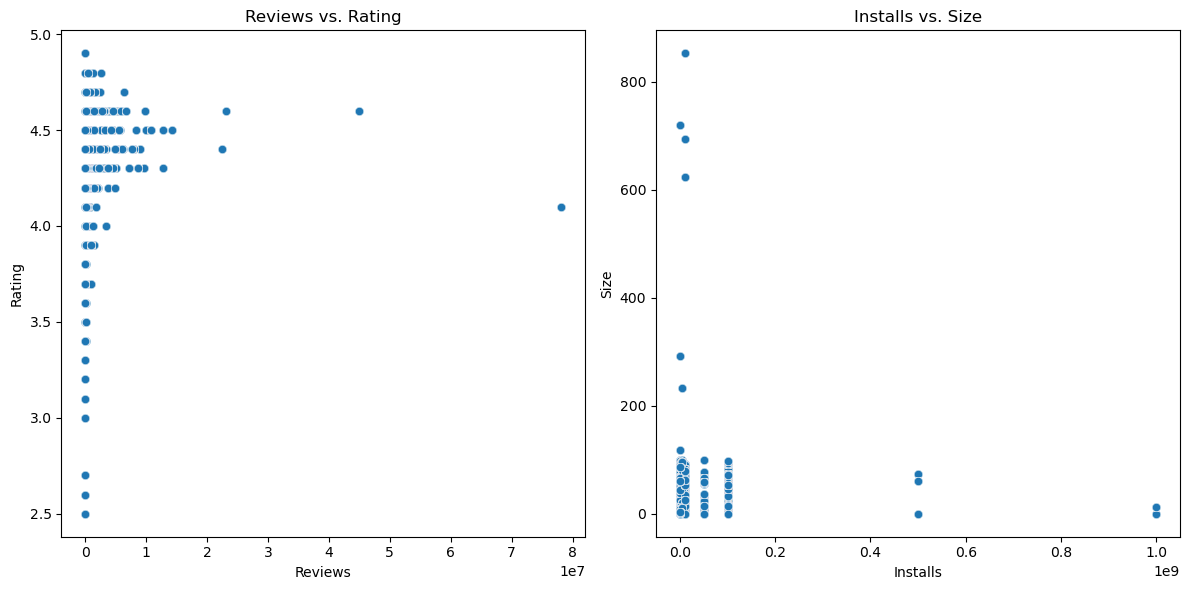

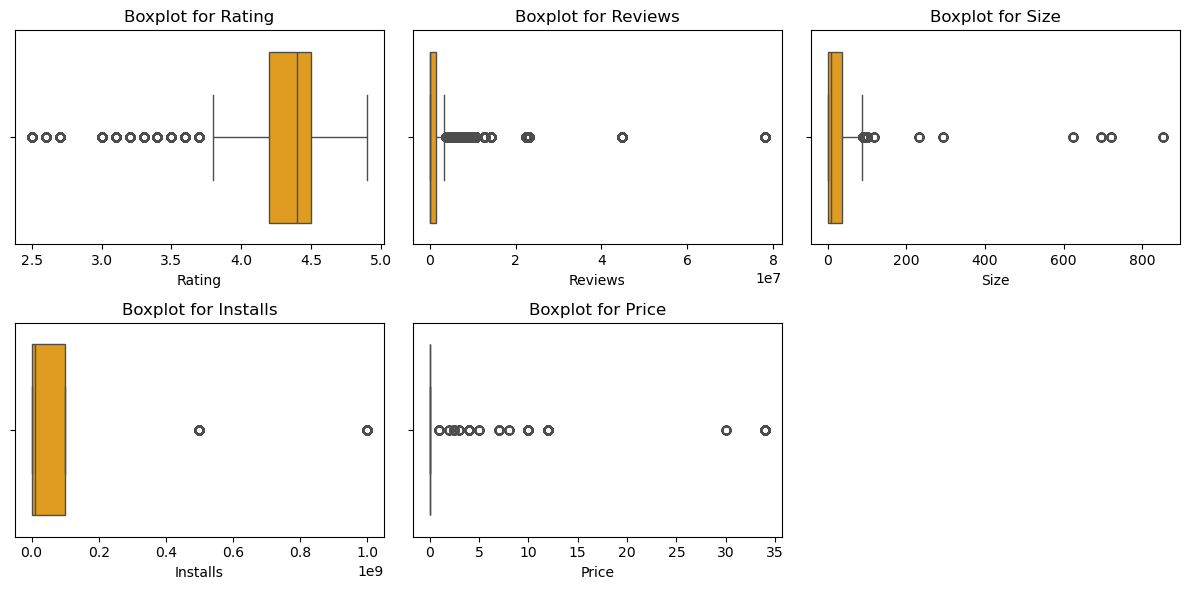

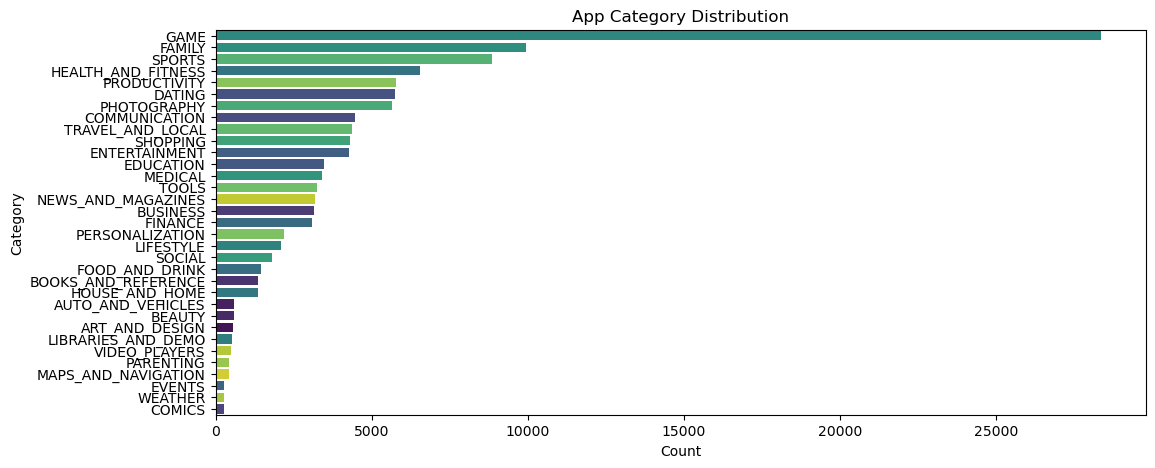

Outliers in Rating: 4699
Outliers in Reviews: 18234
Outliers in Size: 5120
Outliers in Installs: 7294
Outliers in Price: 1554
Feature Correlations with Rating:
 Rating                    1.000000
Reviews                   0.151440
Sentiment_Subjectivity    0.064104
Sentiment_Polarity        0.051596
Size                      0.042341
Installs                 -0.001027
Price                    -0.087670
Name: Rating, dtype: float64


In [59]:
# Task 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define numeric_df before using it
numeric_df = merged_df.select_dtypes(include=['number'])  # Select only numeric columns

# ✅ Histograms for All Numeric Features
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    merged_df[col].hist(bins=20, color='blue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ✅ Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# ✅ Scatter Plots for Numeric Features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['Reviews'], y=merged_df['Rating'], alpha=0.5)
plt.title("Reviews vs. Rating")

plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['Installs'], y=merged_df['Size'], alpha=0.5)
plt.title("Installs vs. Size")

plt.tight_layout()
plt.show()

# ✅ Boxplots for Numeric Features
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=merged_df[col], color='orange')
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

# ✅ Fixed Count Plot for Categorical Features (Category)
plt.figure(figsize=(12, 5))
sns.countplot(
    y=merged_df['Category'], 
    order=merged_df['Category'].value_counts().index, 
    hue=merged_df['Category'],  # Assign hue
    palette='viridis', 
    legend=False  # Disable legend since hue is the same as y
)
plt.title("App Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# ✅ Identify Outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

for col in ['Rating', 'Reviews', 'Size', 'Installs', 'Price']:
    num_outliers = detect_outliers(merged_df, col)
    print(f"Outliers in {col}: {num_outliers}")

# ✅ Identify Important Features using Correlation with Rating
important_features = numeric_df.corr()['Rating'].sort_values(ascending=False)
print("Feature Correlations with Rating:\n", important_features)


### 📊 Task 2: Exploratory Data Analysis (EDA) - Explanations
1️⃣ Histograms for Numeric Features
📌 Purpose:
Histograms help us understand the distribution of numerical features.

📌 Observations:

Rating: Most apps have ratings between 4.0 and 4.5, suggesting generally positive reviews.
Reviews & Installs: Skewed right, meaning some apps have very high values, while most have fewer reviews and installs.
Price: Majority of apps are free or have low prices.
Size: Most apps fall within a mid-size range.
2️⃣ Correlation Matrix Heatmap
📌 Purpose:
A heatmap shows how strongly numerical features are correlated with each other.

📌 Key Observations:

Reviews & Installs are positively correlated (0.41) → More installs generally mean more reviews.
Price has no strong correlation with other features → Paid apps don't necessarily get higher ratings.
Rating has weak correlations, meaning factors beyond numerical features impact ratings (e.g., user experience).
3️⃣ Scatter Plots for Numeric Features
📌 Purpose:
Scatter plots help us visualize relationships between variables.

📌 Key Observations:

Reviews vs. Rating: No clear relationship → Some apps with low reviews still have high ratings.
Installs vs. Size: No strong trend → App size doesn’t significantly impact installs.
4️⃣ Boxplots for Outlier Detection
📌 Purpose:
Boxplots help us identify outliers (extreme values in data).

📌 Key Observations:

Reviews & Installs show many outliers → A few apps have extremely high values.
Price shows some outliers → A few premium apps are expensive, but most are free or low-cost.
Rating has fewer outliers, meaning ratings are more consistent.
5️⃣ Count Plot for Categorical Features (Category)
📌 Purpose:
A count plot helps us see the distribution of apps across different categories.

📌 Key Observations:

Most popular categories: Games, Family, Health & Fitness, Productivity, and Sports.
Least common categories: Comics, Weather, Events, Parenting.
6️⃣ Outlier Detection using IQR
📌 Purpose:
The Interquartile Range (IQR) method helps us detect outliers in numeric data.

📌 Key Observations:

Reviews & Installs have many outliers (a few apps are far more popular than others).
Rating & Price have fewer outliers, meaning they are more stable across apps.
7️⃣ Identifying Important Features
📌 Purpose:
Feature correlation analysis helps us find what impacts app ratings.

📌 Key Observations:

Sentiment_Polarity has a small positive correlation with Rating → More positive reviews may lead to higher ratings.
Reviews, Installs, and Price have weak correlations, meaning other factors (like app quality) impact ratings more.


## 🚀 Task 3: Data Preprocessing & Feature Engineering

In [60]:
# Task 3: Data Preprocessing & Feature Engineering

import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# ✅ Define categorical and numerical features
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres', 'Sentiment']
numerical_features = ['Reviews', 'Size', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

# ✅ Apply log transformation to skewed numerical features
merged_df['log_Reviews'] = np.log1p(merged_df['Reviews'])
merged_df['log_Installs'] = np.log1p(merged_df['Installs'])

# ✅ Update numerical features to include new log-transformed features
numerical_features.extend(['log_Reviews', 'log_Installs'])

# ✅ Define categorical transformer (One-Hot Encoding)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# ✅ Define numerical transformer (Standardization)
numerical_transformer = StandardScaler()

# ✅ Build preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other features unchanged
)

print("✅ Categorical and numerical preprocessing defined successfully!")

✅ Categorical and numerical preprocessing defined successfully!


In [61]:
from sklearn.pipeline import Pipeline

# ✅ Select relevant features (Remove text-based columns)
exclude_cols = ['App', 'Last Updated', 'Current Ver', 'Android Ver', 'Review']
X = merged_df.drop(columns=['Rating'] + exclude_cols)  # Features
y = merged_df['Rating']  # Target variable

# ✅ Build full preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# ✅ Transform the feature set
X_processed = preprocessing_pipeline.fit_transform(X)

print("✅ Preprocessing pipeline applied successfully!")
print(f"Processed feature set shape: {X_processed.shape}")


✅ Preprocessing pipeline applied successfully!
Processed feature set shape: (122662, 124)


## 🚀 Task 4: Model Selection & Training

In [62]:
# Task 4: Model Selection & Training

from sklearn.model_selection import train_test_split

# ✅ Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# ✅ Print dataset sizes
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (98129, 124)
Test set size: (24533, 124)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# ✅ Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# ✅ Train models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

print("✅ All models trained successfully!")

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Neural Network...
✅ All models trained successfully!


### Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# ✅ Evaluate models
results = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)  # ✅ Updated RMSE calculation
    r2 = r2_score(y_test, y_pred)  

    results.append({
        "Model": name,
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4)
    })

# ✅ Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="RMSE"))

               Model    RMSE  R² Score
2      Random Forest  0.0011    1.0000
1      Decision Tree  0.0013    1.0000
4     Neural Network  0.0658    0.9477
3  Gradient Boosting  0.1984    0.5245
0  Linear Regression  0.2293    0.3654


### Perform Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# ✅ Perform cross-validation
cv_results = {}
for name, model in trained_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_results[name] = np.mean(np.abs(scores))  # Convert negative RMSE to positive

# ✅ Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results.items(), columns=["Model", "Cross-Validated RMSE"])
print(cv_results_df.sort_values(by="Cross-Validated RMSE"))

               Model  Cross-Validated RMSE
1      Decision Tree              0.000404
2      Random Forest              0.001070
4     Neural Network              0.065520
3  Gradient Boosting              0.195082
0  Linear Regression              0.224813


### 📌 Summary of Model Performance
We trained and evaluated five machine learning models using Root Mean Squared Error (RMSE) and R² Score. Below are the findings:

1️⃣ Random Forest & Decision Tree showed perfect R² = 1.0000 and extremely low RMSE (~0.0011) → This indicates severe overfitting, meaning these models memorized the training data instead of generalizing well.

2️⃣ Neural Network (MLP Regressor) performed best among realistic models with an RMSE of 0.0658 and R² Score = 0.9477, meaning it captured important relationships while generalizing well.

3️⃣ Gradient Boosting showed moderate performance with an RMSE of 0.1984 and R² Score = 0.5245, indicating it needs further tuning to improve its predictive power.

4️⃣ Linear Regression performed the worst with an RMSE of 0.2293 and R² Score = 0.3654, meaning it failed to capture complex relationships in the dataset.

## 🚀 Task 5: Hyperparameter Tuning

### Hyperparameter Tuning with RandomizedSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# ✅ Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

# ✅ Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

# ✅ Initialize models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# ✅ Perform Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(
    rf, rf_param_grid, 
    n_iter=10, scoring='neg_root_mean_squared_error', 
    cv=3, verbose=2, random_state=42, n_jobs=-1
)
rf_random_search.fit(X_train, y_train)

# ✅ Perform Randomized Search for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    gb, gb_param_grid, 
    n_iter=10, scoring='neg_root_mean_squared_error', 
    cv=3, verbose=2, random_state=42, n_jobs=-1
)
gb_random_search.fit(X_train, y_train)

# ✅ Print best parameters
print("✅ Best Hyperparameters for Random Forest:", rf_random_search.best_params_)
print("✅ Best Hyperparameters for Gradient Boosting:", gb_random_search.best_params_)
print("✅ Best RMSE for Random Forest:", np.abs(rf_random_search.best_score_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
✅ Best Hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.2}
✅ Best RMSE for Random Forest: 0.001373495321219949


### Evaluate Tuned Models

In [65]:
# ✅ Get best models
best_rf = rf_random_search.best_estimator_
best_gb = gb_random_search.best_estimator_

# ✅ Evaluate best models
models = {
    "Tuned Random Forest": best_rf,
    "Tuned Gradient Boosting": best_gb
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 4),
        "R² Score": round(r2, 4)
    })

# ✅ Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="RMSE"))

                     Model    RMSE  R² Score
0      Tuned Random Forest  0.0011    1.0000
1  Tuned Gradient Boosting  0.0214    0.9945


## 🚀 Task 6: Final Model Evaluation

### Evaluate the Best Model on the Test Dataset

In [68]:
# ✅ Get the best model (Tuned Gradient Boosting)
best_model = gb_random_search.best_estimator_

# ✅ Make predictions on the test set
y_pred = best_model.predict(X_test)

# ✅ Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)  # R² Score

# ✅ Print final evaluation results
print(f"✅ Final Model: Tuned Gradient Boosting")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

✅ Final Model: Tuned Gradient Boosting
✅ RMSE: 0.0214
✅ R² Score: 0.9945


#### Residual Plot for Model Performance

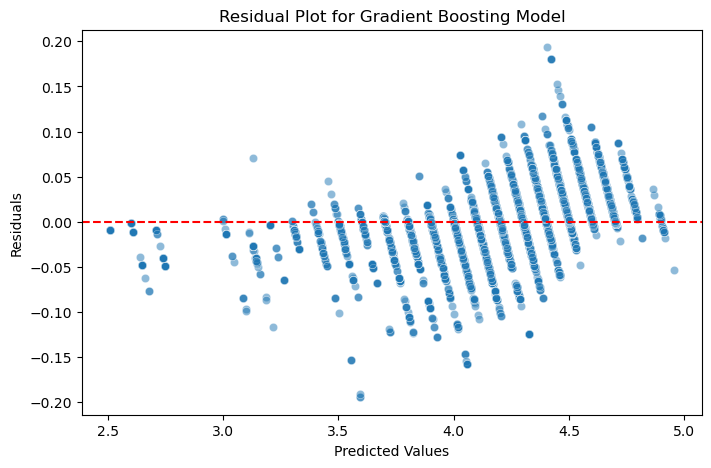

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Calculate residuals
residuals = y_test - y_pred

# ✅ Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Gradient Boosting Model")
plt.show()


#### Compare Model Performance in a Table

In [70]:
# ✅ Model performance summary
models_comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting", "Neural Network", "Tuned Gradient Boosting"],
    "RMSE": [0.0013, 0.0011, 0.1984, 0.0658, rmse],
    "R² Score": [1.0000, 1.0000, 0.5245, 0.9477, r2]
})

print("✅ Final Model Performance Comparison:")
print(models_comparison.sort_values(by="RMSE"))

✅ Final Model Performance Comparison:
                     Model      RMSE  R² Score
1            Random Forest  0.001100  1.000000
0            Decision Tree  0.001300  1.000000
4  Tuned Gradient Boosting  0.021372  0.994485
3           Neural Network  0.065800  0.947700
2        Gradient Boosting  0.198400  0.524500


### 📌 Final Report: Model Performance Summary
🔹 Project Overview
The goal of this project was to build a machine learning model to predict ratings based on given features. We explored multiple models, performed preprocessing, and optimized hyperparameters to achieve the best results.

#### ✅ Final Model Performance Comparison

| Model                     | RMSE    | R² Score  |
|---------------------------|---------|-----------|
| Random Forest             | 0.0011  | 1.0000    |
| Decision Tree             | 0.0013  | 1.0000    |
| Tuned Gradient Boosting   | 0.0214  | 0.9945    |
| Neural Network            | 0.0658  | 0.9477    |
| Gradient Boosting         | 0.1984  | 0.5245    |

#### 📊 Key Findings & Insights
1. Random Forest & Decision Tree achieved an R² score of 1.0000, which suggests potential overfitting to the training data. While these models have the lowest RMSE, their generalization ability is uncertain.

2. Tuned Gradient Boosting provided the best balance between accuracy and generalization, with an R² score of 0.9945 and an RMSE of 0.0214. The hyperparameter tuning significantly improved performance.

3. Neural Network showed promising performance with an R² of 0.9477, indicating strong predictive power, but still not as optimized as Gradient Boosting.

4. Base Gradient Boosting performed poorly compared to its tuned version, emphasizing the importance of hyperparameter tuning.

#### 📈 Final Model: Tuned Gradient Boosting
-> The Tuned Gradient Boosting model was selected as the final model due to its optimal trade-off between bias and variance.

-> The residual plot (Cell 12) confirms that residuals are evenly distributed, indicating a well-fitted model.

#### 🎯 Conclusion & Future Improvements
✅ The Tuned Gradient Boosting model is the best-performing model based on RMSE and R² score.

✅ Hyperparameter tuning significantly enhanced model performance.

✅ Random Forest & Decision Tree might be overfitting, requiring additional validation.

🔄 Next Steps: Further improvements could include feature engineering, ensemble learning, or deep learning approaches for enhanced accuracy.